In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import json

In [2]:
def parseData(fname):
    with open(fname) as f:
        for line in f:
            yield eval(line)

In [3]:
review = list(parseData('review.json'))

In [4]:
print len(review)

5261669


## tf-idf + k-means

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import csv
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import RegexpTokenizer
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from operator import itemgetter
from nltk.stem.porter import PorterStemmer
import gensim
from gensim import corpora, models
import csv
from collections import defaultdict
import string
import sys
import json

c:\python27\lib\site-packages\gensim\utils.py:865: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Using TensorFlow backend.


In [9]:
from sklearn.decomposition import LatentDirichletAllocation,TruncatedSVD
from sklearn.preprocessing import MaxAbsScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
import pandas as pd
import random
import numpy as np

In [83]:
text_list = []
punctuation = set(string.punctuation)
data = review[0:100000]
for d in data:
    r = ''.join([c for c in d['text'].lower() if not c in punctuation])
    text_list.append(r)

In [84]:
print text_list[1]

super simple place but amazing nonetheless its been around since the 30s and they still serve the same thing they started with a bologna and salami sandwich with mustard 

staff was very helpful and friendly


In [85]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(text_list)

In [86]:
true_k = 10
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
m = model.fit(X)

In [87]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print
 
 
print("\n")
print("Prediction")

Top terms per cluster:
Cluster 0:  sushi  rolls  roll  place  good  fresh  great  service  food  sashimi
Cluster 1:  ice  thai  cream  pad  und  die  tea  place  good  food
Cluster 2:  room  hotel  stay  rooms  pool  stayed  nice  strip  vegas  casino
Cluster 3:  place  love  like  good  best  staff  just  time  friendly  ive
Cluster 4:  pizza  crust  good  great  place  cheese  pizzas  order  sauce  like
Cluster 5:  good  ordered  burger  place  like  just  fries  food  cheese  really
Cluster 6:  time  car  service  did  customer  work  hair  job  told  said
Cluster 7:  food  good  service  place  restaurant  time  just  really  like  great
Cluster 8:  great  food  service  place  friendly  staff  love  good  atmosphere  awesome
Cluster 9:  chicken  good  food  fried  rice  place  ordered  sauce  great  salad


Prediction


In [56]:
predict_ = m.predict(X)

In [88]:
features = m.transform(X)

In [89]:
print features[0]

[ 1.02709939  1.00776996  1.01488172  0.98520538  1.02846311  0.98087393
  0.994284    0.99294184  0.99753823  0.99746694]


In [16]:
def get_svd(data, components):
    svd = TruncatedSVD(n_components=components).fit(data)
    data_processed = svd.transform(data)
    return svd, data_processed

def supress_data(size):
    supressed_data = []
    counter = {}
    for x in range(10):
        counter[x] = 0
    while len(supressed_data) < size:
        a = int(random.random() * len(data))
        if counter[predict_[a]] < size/10:
            supressed_data.append(a)
            counter[predict_[a]] += 1
    random_data = np.array(svd_m)[supressed_data,:]
    supressed_results = np.array(predict_)[supressed_data]
    return random_data,supressed_results

def get_tsne(data, components, perplexity):
    tsne = TSNE(n_components=components, perplexity=perplexity, n_iter=1000)
    low_data = tsne.fit_transform(data)
    return tsne, low_data

def plot_scatter_2d(x, y, c, title):
    plt.title('KMeans-TFIDF Clustering of Titles(t-SNE Plot)') 
    df = pd.DataFrame({'x': x, 'y': y, 'c': c})
    l = len(np.unique(c))
    ax = plt.subplot(111)
    colors = cm.rainbow(np.linspace(0, 1, l))
    for c in range(0,l):
        qq = df[df['c']==c]
        ax.scatter(qq['x'], qq['y'],c=colors[c], label=c)
    plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=8, title='Topic/Cluster')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_title(title)
    plt.savefig('KMeans-TFIDF Clustering of Titles(t-SNE Plot).png',dpi=600)
    plt.show()

In [17]:
# SVD(LSA)
svd_v, svd_m = get_svd(X, 100) # For LSA, a value of 100 is recommended.
variances = svd_v.explained_variance_ # each title's variance is roughly 0.006, which is acceptable
svd_center_v, svd_center_m = get_svd(order_centroids, 100)

In [ ]:
# plot k_means clustering results
supressed_data, supressed_results = supress_data(250)
tnse_v, tsne_m = get_tsne(supressed_data, 2, 25)
plot_scatter_2d(tsne_m[:,0], tsne_m[:,1], supressed_results, 'KMeans-TFIDF Clustering of Titles(t-SNE Plot)')

In [90]:
feature_list = []
label_list = []
#user_feature_dict = {}
#business_feature_dict = {}

# for u in user:
#     user_feature_dict[u["user_id"]] = u["average_stars"]
# for b in business:
#     business_feature_dict[b["business_id"]] = b["stars"]
feature_list = features
for r in review[0:100000]:
#     feature_list.append(text_features[i])
#     feature_list.append(user_feature_dict[r["user_id"]])
#     feature_list.append(business_feature_dict[r["business_id"]])
    like = 0
    if r["stars"] > 3.5: like = 1
    label_list.append(like)

print "feature[title_keyword,submission_time,username,subreddit]:",feature_list[0]
print "label[comment_number]:",label_list[0]

feature[title_keyword,submission_time,username,subreddit]: [ 1.02709939  1.00776996  1.01488172  0.98520538  1.02846311  0.98087393
  0.994284    0.99294184  0.99753823  0.99746694]
label[comment_number]: 1


In [91]:
import os
import time
from sklearn import metrics
import numpy as np
import pickle

import sys

In [92]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [93]:
X_train, X_test, y_train, y_test = train_test_split(feature_list, label_list, random_state=4)

In [94]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
min_max_scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## logistic Regression Classifier

In [95]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import recall_score
LR = LogisticRegression(penalty='l2', class_weight = 'balanced') # balanced：让类库自己计算类型权重
LR_scores = cross_val_score(LR, X_train, y_train, cv=10, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (LR_scores.mean(), LR_scores.std() * 2))

scoring = {'prec_macro': 'precision_macro','rec_micro': make_scorer(recall_score, average='macro')}
all_scores = cross_validate(LR, X_train, y_train, scoring=scoring,cv=10, return_train_score=True)
score = all_scores['test_rec_micro'] 
print("Recall: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score = all_scores['test_prec_macro'] 
print("Precision: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.70 (+/- 0.01)
Recall: 0.72 (+/- 0.01)
Precision: 0.69 (+/- 0.00)


In [96]:
LR.fit(X_train,y_train)
theta = LR.coef_
predict = LR.predict(X_test)
precision = metrics.precision_score(y_test, predict)
recall = metrics.recall_score(y_test, predict)
print ('precision: %.2f%%, recall: %.2f%%' % (100 * precision, 100 * recall))
accuracy = metrics.accuracy_score(y_test, predict)
print ('accuracy: %.2f%%' % (100 * accuracy) )
print("Theta",theta)

precision: 84.34%, recall: 67.70%
accuracy: 70.16%
('Theta', array([[-0.0123841 , -0.05557202,  0.27444948, -1.05264793, -0.00951177,
         0.56212701,  0.79758231,  1.27123997, -1.9269198 , -0.13907281]]))


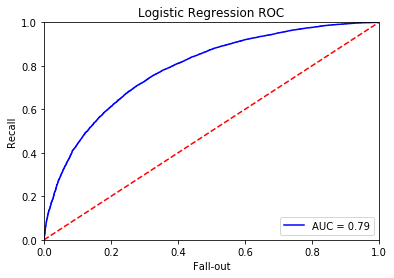

In [97]:
from sklearn.metrics import roc_curve, auc  
predictions = LR.predict_proba(X_test)  
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions[:, 1])  
roc_auc = auc(false_positive_rate, recall)  
plt.title('Logistic Regression ROC')  
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)  
plt.legend(loc='lower right')  
plt.plot([0, 1], [0, 1], 'r--')  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.0])  
plt.ylabel('Recall')  
plt.xlabel('Fall-out') 
plt.savefig('Logistic Regression ROC.png')
plt.show()  

In [98]:
# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predict = knn.predict(X_test)
precision = metrics.precision_score(y_test, predict)
recall = metrics.recall_score(y_test, predict)
print ('precision: %.2f%%, recall: %.2f%%' % (100 * precision, 100 * recall))
accuracy = metrics.accuracy_score(y_test, predict)
print ('accuracy: %.2f%%' % (100 * accuracy) )

precision: 77.16%, recall: 84.68%
accuracy: 73.15%


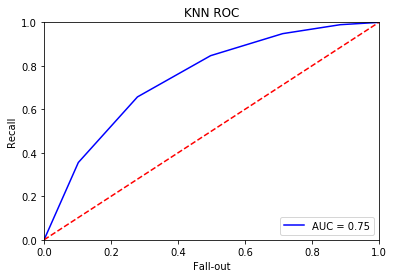

In [99]:
from sklearn.metrics import roc_curve, auc  
predictions = knn.predict_proba(X_test)  
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions[:, 1])  
roc_auc = auc(false_positive_rate, recall)  
plt.title('KNN ROC')  
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)  
plt.legend(loc='lower right')  
plt.plot([0, 1], [0, 1], 'r--')  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.0])  
plt.ylabel('Recall')  
plt.xlabel('Fall-out')
plt.savefig('KNN ROC.png')
plt.show() 

In [100]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import recall_score
scoring = {'prec_macro': 'precision_macro','rec_micro': make_scorer(recall_score, average='macro')}

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
knn = KNeighborsClassifier(n_neighbors=5)
all_scores = cross_validate(knn, X_train, y_train, scoring=scoring,cv=10, return_train_score=True)
score = all_scores['test_rec_micro'] 
print("Recall: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score = all_scores['test_prec_macro'] 
print("Precision: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.73 (+/- 0.01)
Recall: 0.68 (+/- 0.01)
Precision: 0.70 (+/- 0.01)


In [101]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.68206620347211033, 0.64350659227756901, 0.71783977733996651, 0.7015465308833162, 0.73181301842085378, 0.72325318718577525, 0.73973313941404106, 0.73379992689090234, 0.74366650835792314, 0.74046665408829604, 0.74769319107934562, 0.7448665706002946, 0.75045319645273822, 0.7483866435363552, 0.75098656357214633, 0.74946653688722731, 0.7508799502378658, 0.75110654579863501, 0.75214651203578986, 0.75255990226085756, 0.75305322849398337, 0.75331998227389596, 0.75383989338927226, 0.75431985250773059, 0.75397324094435392, 0.75502652629119749, 0.75459984184153794, 0.75502647651815968, 0.75469312540088507, 0.75547976719478105]


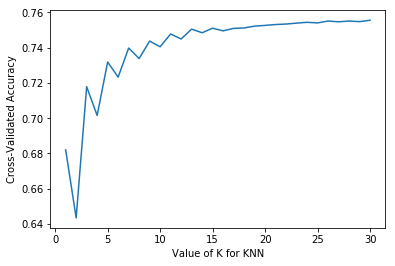

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [103]:
# The optimal value of K is 15
knn = KNeighborsClassifier(n_neighbors=15)
knn_scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print(knn_scores.mean())

0.750986563572


## SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=0.1, gamma=1, probability=True)
svm_scores = cross_val_score(svm, X_train, y_train, cv=3, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (svm_scores.mean(), svm_scores.std() * 2))

scoring = {'prec_macro': 'precision_macro','rec_micro': make_scorer(recall_score, average='macro')}
all_scores = cross_validate(svm, X_train, y_train, scoring=scoring,cv=10, return_train_score=True)
score = all_scores['test_rec_micro'] 
print("Recall: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score = all_scores['test_prec_macro'] 
print("Precision: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.75 (+/- 0.00)


In [ ]:
svm.fit(X_train,y_train)
predict = svm.predict(X_test)
precision = metrics.precision_score(y_test, predict)
recall = metrics.recall_score(y_test, predict)
print ('precision: %.2f%%, recall: %.2f%%' % (100 * precision, 100 * recall))
accuracy = metrics.accuracy_score(y_test, predict)
print ('accuracy: %.2f%%' % (100 * accuracy) )

In [ ]:
from sklearn.metrics import roc_curve, auc  
predictions = LR.predict_proba(X_test)  
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions[:, 1])  
roc_auc = auc(false_positive_rate, recall)  
plt.title('SVM ROC')  
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)  
plt.legend(loc='lower right')  
plt.plot([0, 1], [0, 1], 'r--')  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.0])  
plt.ylabel('Recall')  
plt.xlabel('Fall-out') 
plt.savefig('SVM ROC.png')
plt.show()  